In [1]:
%pip install shap

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import joblib
import shap
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/544.4 kB ? eta -:--:--
                                              0.0/544.4 kB ? eta -:--:--
                                              0.0/544.4 kB ? eta -:--:--
     --                                      41.0/544.4 kB 1.9 MB/s eta 0:00:01
     --                                      41.0/544.4 kB 1.9 MB/s eta 0:00:01
     ----                                  61.4/544.4 kB 409.6 kB/s eta 0:00:02
     ----                                  61.4/544.4 kB 409.6 kB/s eta 0:00:02
     -----                                 81.9/544.4 kB 327.3 kB/s eta 0:00:02
     --------                             122.9/544.4 kB 481.4 kB/s eta 0:00:01
     --------                             122.9/544.4 kB 481.4 kB/s eta 0:00:01
     -------------                        204.8/544.4 kB 565.6 kB/s eta 0:00:01
     -------------                        204.8/544.4 kB 565.6 kB/s eta 0:00:01
     ------------------                   286.7/544.4 kB 610.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
merged_data = pd.read_csv("D:\projects\ESG-Risk-Scoring-System\src\data\merged_data.csv")

In [10]:
print(merged_data)

    company      sector  carbon_emissions  diversity_ratio  governance_score  \
0      AAPL        Tech         2300000.0             0.31              88.5   
1      AAPL        Tech         2300000.0             0.31              88.5   
2      AAPL        Tech         2300000.0             0.31              88.5   
3      AAPL        Tech         2300000.0             0.31              88.5   
4      AAPL        Tech         2300000.0             0.31              88.5   
..      ...         ...               ...              ...               ...   
215    TSLA  Automotive         2500000.0             0.32              78.0   
216    TSLA  Automotive         2500000.0             0.32              78.0   
217    TSLA  Automotive         2500000.0             0.32              78.0   
218    TSLA  Automotive         2500000.0             0.32              78.0   
219    TSLA  Automotive         2500000.0             0.32              78.0   

     risk_score        date  close_pric

In [12]:
X = merged_data[["carbon_emissions", "diversity_ratio", "governance_score", "sentiment", "volatility", "carbon_tax_rate"]]
y = merged_data["risk_score"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [13]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 176
Validation set size: 22


In [14]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [15]:
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
print(f"Validation MSE: {mse_val}")

Validation MSE: 355.7985372865856


In [16]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Model MSE: {mse}")

Model MSE: 279.3694185774871


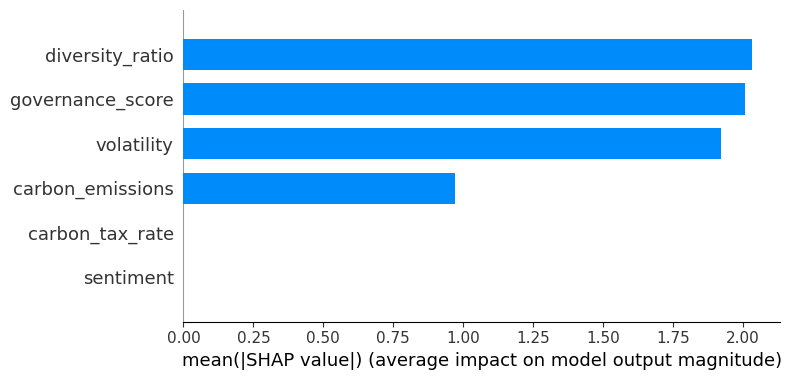

In [23]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("D:\projects\ESG-Risk-Scoring-System\static\shap_summary.png")
plt.close()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)

In [21]:
joblib.dump(model, "D:\projects\ESG-Risk-Scoring-System\models\esg_risk_model.pkl")

['D:\\projects\\ESG-Risk-Scoring-System\\models\\esg_risk_model.pkl']